In [1]:
"""
Created on Sun Apr  9 13:25:13 2017

@author: hanlinz
"""

'\nCreated on Sun Apr  9 13:25:13 2017\n\n@author: hanlinz\n'

In [2]:
%matplotlib inline

In [3]:
import matplotlib as plt
from collections import Counter

In [4]:
# %load load_data.py
"""
Created on Sun Apr  9 13:25:13 2017

@author: hanlinz
"""
#setup evniornments
import pandas as pd
import numpy as np

#load data from file
agency = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/agency.txt")
calendar = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/calendar.txt")
calendar_dates = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/calendar_dates.txt")
fare_attributes = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/fare_attributes.txt")
fare_rules = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/fare_rules.txt")
routes = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/routes.txt")
shapes = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/shapes.txt")
stop_times = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/stop_times.txt")
stops = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/stops.txt")
trips = pd.read_csv("/home/hanlinz3/work/data-readonly/CUMTD/trips.txt")

#load data into df
stp_time = pd.DataFrame({'trip_id': stop_times['trip_id'], 'stop_times': stop_times['arrival_time'],
                         "stop_sequence": stop_times['stop_sequence'].astype('int64')})

#dic for data cleanning
diff = {}
diff['trip_id']=[]
diff['start_min']=[]
diff['stop_min']=[]
diff['start_time']=[]
diff['stop_time']=[]
diff['result']=[]
diff['stops']=[]

#get start and stop time
for i in range(0, len(stp_time)):
    if stp_time['stop_sequence'][i]==0 and i > 0:
        trip_id = stp_time['trip_id'][i]
        start_time = stp_time['stop_times'][i]
        stop_time = stp_time['stop_times'][i-1]
        start_min = start_time.split(":")[1]
        stop_min = stop_time.split(":")[1]
        diff['trip_id'].append(trip_id)
        diff['start_min'].append(start_min)
        diff['stop_min'].append(stop_min)
        diff['start_time'].append(start_time)
        diff['stop_time'].append(stop_time)
        diff['stops'].append(stp_time['stop_sequence'][i-1])

#add components missing, beginning and ending
diff['trip_id'].insert(0,"[@14.0.51708725@][4][1277756770140]/0__T4_UIMF")
diff['start_min'].insert(0,"25")
diff['stop_min'].insert(len(diff['stop_min'])+1,"09")
diff['start_time'].insert(0,"07:25:00")
diff['stop_time'].insert(len(diff['stop_min'])+1,"16:09:37")
diff['stops'].insert(len(diff['stops'])+1,"30")
#check length
print(len(diff['stops']))
print(len(diff['trip_id']))
print(len(diff['stop_min']))
print(len(diff['start_min']))

#calculate travel time interval
start = np.array(diff['start_min'], dtype='int')
stop = np.array(diff['stop_min'], dtype='int')
for i in range (0, len(diff['stop_min'])):
    if stop[i] - start[i] < 0:
        diff['result'].append(stop[i] - start[i] +60)
    else:
        diff['result'].append(stop[i] - start[i]) 

#load into datafram        
df = pd.DataFrame({'trip_id': diff['trip_id'],'time intervals': diff['result'],
                   'start_times':diff['start_time'],'stop_times':diff['stop_time'],
                  'stops': diff['stops']})

#translate trip_id into route_name
merge = pd.DataFrame({'route_id': trips['route_id'], 'trip_id': trips['trip_id']})
print(merge['route_id'].unique())

#get rid of descriptions
for i in range(0, len(merge['route_id'])):
    temp = merge['route_id'][i].split(" ")[0]
    merge['route_id'][i] = temp
print(merge['route_id'].unique())

#get rid of hopper
for i in range(0, len(merge['route_id'])):
    if len(merge['route_id'][i])>9:
        temp = merge['route_id'][i][:-6]
        merge['route_id'][i] = temp
print(merge['route_id'].unique())

#get rid of numbers
for i in range(0, len(merge['route_id'])):
    if merge['route_id'][i][0] == '1':
        merge['route_id'][i] = "YELLOW"
    elif merge['route_id'][i][0] == '3':
        merge['route_id'][i] = "LAVENDER"
    elif merge['route_id'][i][0] == '5':
        merge['route_id'][i] = "GREEN"
    elif merge['route_id'][i][0] == '7':
        merge['route_id'][i] = "GREY"    
    elif merge['route_id'][i] == '10W':
        merge['route_id'][i] = "GOLD"  
print(merge['route_id'].unique())

temp_df1 = pd.merge(df, merge, on='trip_id')

5498
5498
5498
5498
['TEAL' 'RED SATURDAY' 'BRONZE' 'TEAL EVENING' 'GREEN' 'GREEN EXPRESS'
 'YELLOW' 'YELLOWHOPPER' 'GREEN EVENING' 'GREY EVENING' 'GREEN LATE NIGHT'
 'GREENHOPPER EVENING' 'ILLINI EVENING' 'TEAL SUNDAY'
 'TEAL LATE NIGHT SUNDAY' '3S LAVENDER ALT' 'GREEN EXPRESS ALT'
 'GREENHOPPER' 'ILLINI EVENING SATURDAY' 'YELLOW SATURDAY'
 'YELLOW EVENING SATURDAY' 'GREEN SATURDAY' 'LIME SATURDAY'
 'LIME EVENING SATURDAY' 'SILVER SUNDAY' 'SILVER EVENING SUNDAY'
 'LAVENDER SUNDAY' 'BROWN' 'GREEN ALT' 'ORANGE ALT' 'ILLINI LIMITED SUNDAY'
 'ILLINI EVENING SUNDAY' 'ILLINI' 'LAVENDER' 'YELLOW EVENING'
 '1S YELLOW ALT' 'BLUE' 'PINK' 'GREY ALT' '5E GREEN EXPRESS ALT'
 'BROWN ALT' 'GREY' 'YELLOW SUNDAY' 'YELLOW LATE NIGHT SUNDAY'
 'YELLOW LATE NIGHT SATURDAY' 'NAVY' 'LIME SUNDAY' '1N YELLOW ALT PM'
 '5W GREEN EXPRESS 2' 'LAVENDER SATURDAY' 'RED' 'GOLD ALT' 'TEAL SATURDAY'
 'TEAL EVENING SATURDAY' '5E GREEN EXPRESS 1 ALT' 'ILLINI LIMITED SATURDAY'
 'ILLINI LIMITED EVENING SATURDAY' '7W GREY A

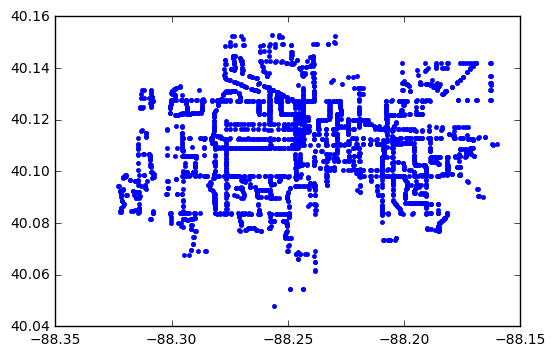

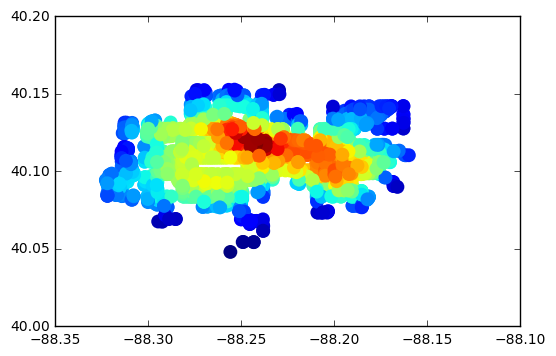

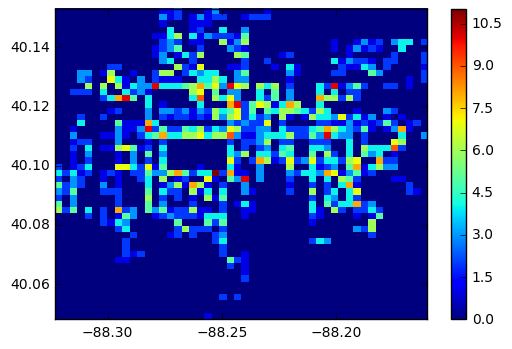

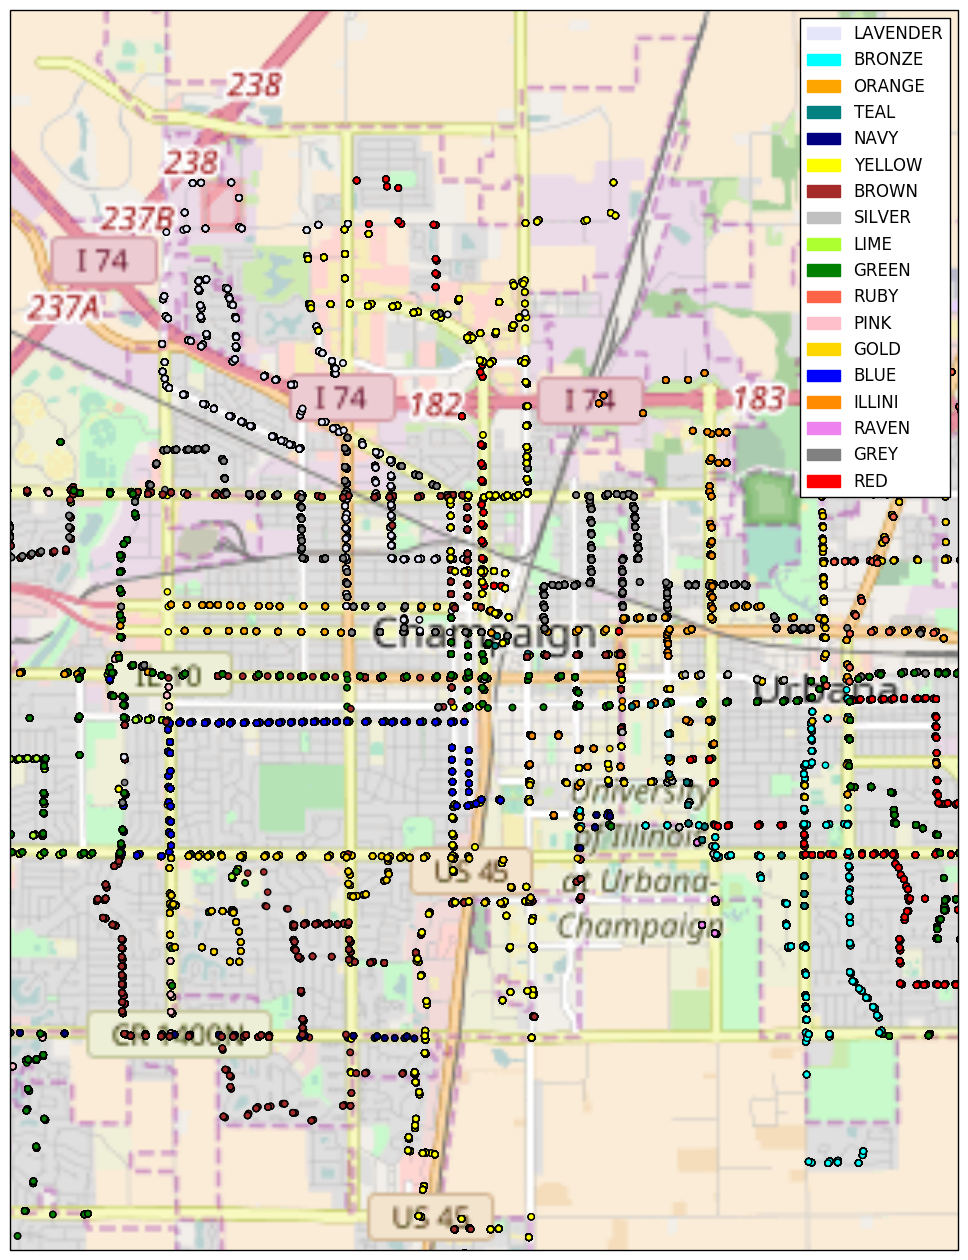

In [5]:
# Code adapted from Group Member Yikai Deng 
# %load viz_yikai.py
import csv
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from collections import Counter
from cartopy.io.img_tiles import OSM
from scipy.stats import gaussian_kde

dataset_stop = open("/home/hanlinz3/work/data-readonly/CUMTD/stops.txt")
data_csv1= csv.reader(dataset_stop)
header1 = next(data_csv1)

data_stop = {}
for name in header1:
    data_stop[name] = []
data_stop

for row in data_csv1:
    for name, value in zip(header1, row):
        data_stop[name].append(value)
        
plt.plot(data_stop['stop_lon'],data_stop['stop_lat'],'.')

sum(Counter(data_stop['stop_id']).values())

x = np.array(data_stop['stop_lat']).astype(np.float)
y = np.array(data_stop['stop_lon']).astype(np.float)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(y, x, c=z, s=100, edgecolor='')
plt.show()
plt.hist2d(y, x, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

dataset_stoptime = open("/home/hanlinz3/work/data-readonly/CUMTD/stop_times.txt")
data_csv2= csv.reader(dataset_stoptime)
header2 = next(data_csv2)

data_stoptimes = {}
for name in header2:
    data_stoptimes[name] = []

for row in data_csv2:
    for name, value in zip(header2, row):
        data_stoptimes[name].append(value)


Counter(data_stoptimes['stop_id'])


dataset_routes = open("/home/hanlinz3/work/data-readonly/CUMTD/routes.txt")
data_csv3= csv.reader(dataset_routes)
header3 = next(data_csv3)

data_routes = {}
for name in header3:
    data_routes[name] = []

for row in data_csv3:
    for name, value in zip(header3, row):
        data_routes[name].append(value)
dataset_trips = open("/home/hanlinz3/work/dv_fnl_pj/CUMTD/trips_re.csv")
data_csv4= csv.reader(dataset_trips)
header4 = next(data_csv4)

data_trips = {}
for name in header4:
    data_trips[name] = []

for row in data_csv4:
    for name, value in zip(header4, row):
        data_trips[name].append(value)
        
c_routes = Counter(data_trips['route_id'])
c_routes
#numbers of trips on each routes

dataset_shapes = open("/home/hanlinz3/work/data-readonly/CUMTD/shapes.txt")
data_csv5 = csv.reader(dataset_shapes)
header5 = next(data_csv5)

data_shapes = {}
for name in header5:
    data_shapes[name] = []

for row in data_csv5:
    for name, value in zip(header5, row):
        data_shapes[name].append(value)
        
left = pd.DataFrame({'stop_id': data_stop['stop_id'], 'stop_lon': data_stop['stop_lon'],'stop_lat': data_stop['stop_lat']})
middle = pd.DataFrame({'stop_id': data_stoptimes['stop_id'], 'trip_id': data_stoptimes['trip_id']})
result1 = pd.merge(left, middle, on='stop_id')
right = pd.DataFrame({'route_id': data_trips['route_id'], 'trip_id': data_trips['trip_id']})
result2 = pd.merge(result1, right, on='trip_id')

result2

Counter(data_trips['route_id'])

import matplotlib.patches as mpatches
use_colours = {'GREEN': '#008000', 'BRONZE': '#00FFFF', 'TEAL': '#008080','BROWN':'#A52A2A','RUBY':'#FF6347','GOLD':'#FFD700','GREY':'#808080'
               ,'ILLINI':'#FF8C00','LAVENDER':'#E6E6FA','NAVY':'#000080','ORANGE':'#FFA500', 'PINK':'#FFC0CB','SILVER':'#C0C0C0','RAVEN':'#EE82EE'
               ,'YELLOW':'#FFFF00', 'LIME':'#ADFF2F','RED':'#FF0000','BLUE':'#0000FF'
              }
              
lat, lon=40.1164, -88.2434
dlat, dlon=0.05, 0.05
osm_tiles=OSM()

plt.figure(figsize=(16,16))
ax = plt.axes(projection=osm_tiles.crs)
ax.set_extent([lon-dlon,lon+dlon,lat - dlat, lat + dlat])
ax.add_image(osm_tiles,12)
ax.stock_img()

ax.scatter(list(result2['stop_lon']),list(result2['stop_lat']), 
             c=[use_colours[x] for x in result2['route_id']],transform=ccrs.PlateCarree())

c_patch=[]
for item, value in zip(use_colours.keys(),use_colours.values()):
    patch=mpatches.Patch(color=value, label=item)
    c_patch.append(patch)

ax.legend(handles=[c_patch[0],c_patch[1],c_patch[2],c_patch[3],c_patch[4],c_patch[5],c_patch[6],c_patch[7],c_patch[8],c_patch[9],
                    c_patch[10],c_patch[11],c_patch[12],c_patch[13],c_patch[14],c_patch[15],c_patch[16],c_patch[17]])
    
plt.show()

In [6]:
temp_df1

,start_times,stop_times,stops,time intervals,trip_id,route_id
0,07:25:00,07:35:00,2,10,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,TEAL
1,07:35:00,07:50:00,15,15,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,TEAL
2,07:55:00,08:15:00,26,20,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,TEAL
3,08:16:00,08:35:00,22,19,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,TEAL
4,08:35:00,08:55:00,26,20,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,TEAL
5,08:56:00,09:15:00,22,19,[@7.0.41893871@][4][1243540851671]/6__T4_UIMF,TEAL
6,09:25:00,09:40:00,17,15,[@7.0.41893871@][3][1243541488843]/110__T4_UIMF,TEAL
7,09:51:00,10:05:00,15,14,[@14.0.51708725@][4][1275506079140]/6__T4_UIMF,TEAL
8,10:15:00,10:35:00,26,20,[@7.0.41893871@][3][1243541396687]/79__T4_UIMF,TEAL
9,10:36:00,10:55:00,22,19,[@7.0.41893871@][4][1243540851671]/11__T4_UIMF,TEAL


In [7]:
Counter(temp_df1['route_id'])

Counter({'BLUE': 69,
         'BRONZE': 76,
         'BROWN': 88,
         'GOLD': 185,
         'GREEN': 637,
         'GREY': 335,
         'ILLINI': 1024,
         'LAVENDER': 192,
         'LIME': 140,
         'NAVY': 22,
         'ORANGE': 142,
         'PINK': 52,
         'RAVEN': 25,
         'RED': 117,
         'RUBY': 126,
         'SILVER': 858,
         'TEAL': 798,
         'YELLOW': 612})

In [9]:
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type
0,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:25:00,07:25:00,DEPOT:1,0,WEST - ILLINOIS TERMINAL,0,0
1,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,2,WEST - ILLINOIS TERMINAL,0,0
2,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,0,WEST - ILLINOIS TERMINAL,0,0
3,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:36:35,07:36:35,PAMD:2,1,NaN,0,0
4,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:37:48,07:37:48,PSL:2,2,NaN,0,0
5,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:38:26,07:38:26,GRGDNR:2,3,NaN,0,0
6,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:39:04,07:39:04,GWNGRG:1,4,NaN,0,0
7,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:39:42,07:39:42,GWNNV:2,5,NaN,0,0
8,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:41:02,07:41:02,KRANNERT:2,6,NaN,0,0
9,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:42:00,07:42:00,GRNMAT:1,7,NaN,0,0
